# **Machine Learning using Python**
#### Title: **Polynomial Regression** AND **Multiple Regression with `NumPy`**

##### Author: **`Bilal KACEL`**
##### Version: 1.0.0

# **1. Polynomial regression**

Let's develop a second degree polynomial: $f(x) = ax^2 + bx + c$

We will prepare matrices with the following shape and content:

$$X = \begin{bmatrix} x^{2 (1)} & x^{(1)} & 1 \\ ... & ... & ... \\ x^{2 (m)} & x^{(m)} & 1 \end{bmatrix}$$

$$\theta = \begin{bmatrix} a \\ b \\ c \end{bmatrix}$$

$$y = \begin{bmatrix} y^{(1)} \\ ... \\ y^{(m)} \end{bmatrix}$$

## **1.1. Import dependencies...**

In [1]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
np.random.seed(0)

## **1.2. Dataset**

Let's generate a dataset, with 1 feature $x_1$

In [2]:
# x: Matrix of Features
# y: Matrix of Target

x, y = make_regression(n_samples=100, n_features=1, noise=10)
y = y + abs(y/2) # get a non-linear dataset for y data

Display data

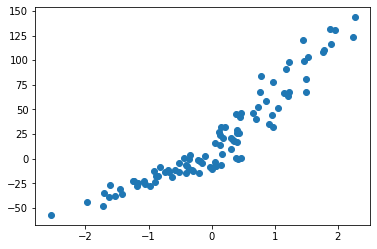

In [3]:
plt.scatter(x, y)

Check the sample's shape: 100 rows/examples (of 1 feature)

In [4]:
x.shape

(100, 1)

Check the target's shape: 100 (for the previous 100 rows)

In [5]:
y.shape

(100,)

We need to specify explicitly that the target shape has one column

In [6]:
y = y.reshape(y.shape[0], 1)
y.shape

(100, 1)

Creation of the matrix X with the biais column with ones (at the right side)

In [7]:
X = np.hstack(( x, np.ones(x.shape) ))
X = np.hstack( (x**2, X) )
X.shape

(100, 3)

Let's see what's the head of the data

In [8]:
print(X[:5])

[[ 0.12927848 -0.35955316  1.        ]
 [ 0.95382381  0.97663904  1.        ]
 [ 0.1618788   0.40234164  1.        ]
 [ 0.66120688 -0.81314628  1.        ]
 [ 0.78816353 -0.88778575  1.        ]]


Initialization of the parameter vector $\theta$ with 3 parameters: $a$, $b$ and $c$

In [9]:
theta = np.random.randn(3, 1)
theta.shape

(3, 1)

In [10]:
print(theta)

[[-0.63743703]
 [-0.39727181]
 [-0.13288058]]


Until here, we get: 
*   $X$ : matrix of Features
*   $y$ : matrix of Target
*   $\theta$ : matrix of Parameters


## **1.3. (Linear) Model**

We would like to implement the model: **$F = X . \theta$**

In [11]:
def model(X, theta):

    return X.dot(theta)

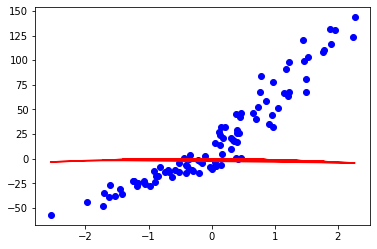

In [12]:
plt.scatter(x, y, c='b')
plt.plot(x, model(X, theta), c='r')

## **1.4. Loss (cost function)**

Here, we choose to use the **`MSE`**: ***Mean Squared Error***:

$$ J(\theta) = \frac{1}{2m} \sum (X.\theta - y)^2 $$


In [13]:
def cost_function(X, y, theta):
    m = len(y) # m: nb of examples in the dataset = 100
    
    return 1/(2*m) * np.sum( (model(X, theta) - y)**2 )

Let's test the loss value for this (not performing) model

In [14]:
cost_function(X, y, theta)

1328.6654828872622

## **1.5. Gradient Descent**

Calculation of the gradients:

$$ \frac{\partial J(\theta)}{\partial(\theta)} = \frac{1}{m} . X^T . (X.\theta - y)$$

In [15]:
def grad(X, y, theta):
    m = len(y)
    
    return 1/m * X.T.dot(model(X, theta) - y)

Implementation of the Gradient Descent algorithm:

$$ \theta = \theta - \alpha . \frac{\partial J(\theta)}{\partial(\theta)}$$

In [16]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    
    cost_history = np.zeros(n_iterations)
    
    for i in range(0, n_iterations):
        theta = theta - (learning_rate * grad(X, y, theta)) # iterative update of the parameters vector 'theta'
        cost_history[i] = cost_function(X, y, theta) # Historization of the losses during the interations
        
    return theta, cost_history

## **1.6. Model Training**

In [17]:
learning_rate = 0.01
n_iterations = 1000

theta_final, cost_history = gradient_descent(X, y, theta, learning_rate, n_iterations)

In [18]:
theta_final.shape

(3, 1)

In [19]:
print(theta_final)

[[ 8.60077615]
 [42.23116732]
 [ 8.18143081]]


## **1.7. Predictions**

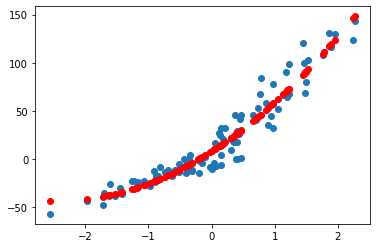

In [20]:
predictions = model(X, theta_final)
plt.scatter(x, y)
plt.scatter(x, predictions, c='r')

## **1.8. Learning curve**

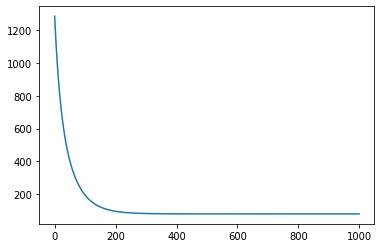

In [21]:
plt.plot(range(n_iterations), cost_history)

## **1.9. Evaluation**

To evaluate the performance of the model, we can use the ***Determination coefficient***:

$$ R^2 = 1 - \frac{\sum(y - f(x))^2 }{\sum(y - \bar y )^2} $$

In [22]:
def coef_determination(y, pred):
    
    u = ( (y - pred)**2 ).sum() # Résidu de la somme des carrés
    v = ( (y - y.mean())**2 ).sum() # Somme totale des carrés
    
    return 1 - (u / v)

In [23]:
coef_determination(y, predictions)

0.9287186469389942

Looking to the result, our model "seems" to perform at 92%

# **2. Multiple regression**

## **2.1. Dataset**
Let's generate a dataset, with 2 features $x_1$ and $x_2$

In [24]:
# x: matrice des Features
# y: matrice de la Target

x, y = make_regression(n_samples=100, n_features=2, noise=10)

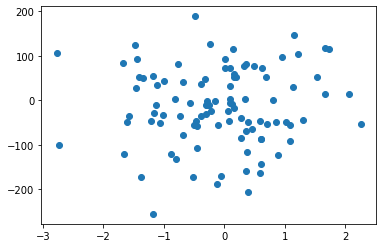

In [25]:
plt.scatter(x[:, 0], y) # plot the variable x1

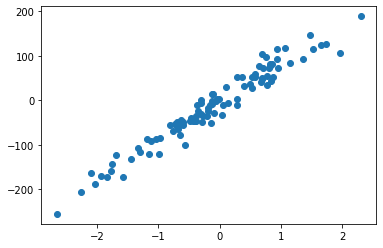

In [26]:
plt.scatter(x[:, 1], y) # plot the variable x2

In [27]:
x.shape

(100, 2)

In [28]:
y = y.reshape(y.shape[0], 1)
y.shape

(100, 1)

In [29]:
X = np.hstack( ( x, np.ones((x.shape[0], 1))) )
print(X.shape)
print(X[:5])

(100, 3)
[[ 0.09395323  0.94304609  1.        ]
 [-0.4533858  -0.68783761  1.        ]
 [-0.31932842  0.69153875  1.        ]
 [ 0.00529265  0.8005648   1.        ]
 [-0.52118931 -1.84306955  1.        ]]


In [30]:
theta = np.random.randn(3, 1)
print(theta.shape)
print(theta)

(3, 1)
[[ 1.51826117]
 [ 0.41034516]
 [-0.05372246]]


## **2.2. Linear Model**
It's the same model as for the Polynomial Regression (see 1.3)

## **2.3. Cost function (Loss)**
It's the same as cost function for the Polynomial Regression (see 1.4)

## **2.4. Gradient Descent**
Gradient and Gradient Descent calcuation are the same as for the Polynomial regression (see 1.5)

## **2.5. Training**

In [31]:
learning_rate = 0.01
n_iterations = 1000

theta_final, cost_history = gradient_descent(X, y, theta, learning_rate, n_iterations)

In [32]:
print(theta_final)

[[16.41423568]
 [87.64274992]
 [-0.99047935]]


## **2.6. Predictions**

It's a bit difficult to see and t understand the results in 2D display. Let's try in 3D

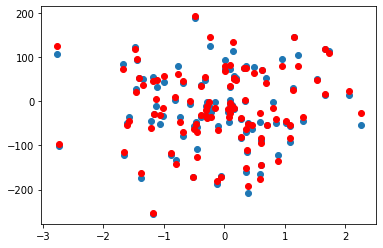

In [33]:
predictions = model(X, theta_final)
plt.scatter(x[:, 0], y)
plt.scatter(x[:, 0], predictions, c='r')

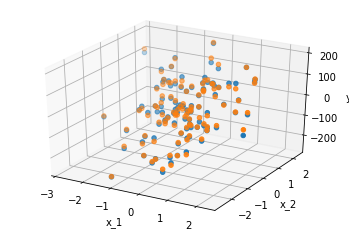

In [37]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_zlabel('y')

ax.scatter(x[:,0], x[:,1], y)
ax.scatter(x[:,0], x[:,1], predictions)

## **2.7. Learning curve**

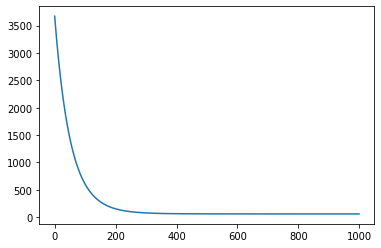

In [34]:
plt.plot(range(n_iterations), cost_history)

## **2.8. Evaluation (performance)**

In [35]:
def coef_determination(y, pred):
    
    u = ( (y - pred)**2 ).sum()
    v = ( (y - y.mean())**2 ).sum()
    
    return 1 - (u / v)

In [36]:
coef_determination(y, predictions)

0.984557625740378